# Programmieraufgabe 9

In dieser Aufgabe wollen wir das in Aufgabe 24 aufgestellte Model lösen, und herausfinden, von wo aus das folgende Foto aufgenommen wurde:

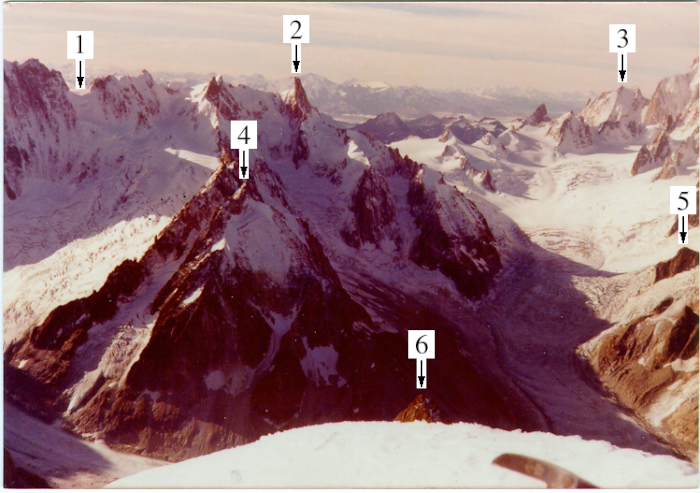

Tragen Sie zunächst in der folgenden Zelle **beide** Ihre Namen ein:

In [ ]:
# Numerische Optimierungsverfahren der Wirtschaftsmathematik
# Wintersemester 2025/2026
# Übungsblatt 9 - Programmieraufgabe 9
#
# [Nachname], [Vorname]
# [Vorname.Nachname@uni-a.de]
# 
# [Nachname], [Vorname]
# [Vorname.Nachname@uni-a.de]

Führen Sie die folgende Zelle zu Beginn einmal aus, selbst wenn Sie ihre Importe selbst definieren. Sie werden unter anderem auch für das Plotting benötigt.

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import numpy.linalg as la

from numpy import random

Implementieren Sie nun das Gauss-Newton-Verfahren aus Aufgabe 19. Das Verfahren berechnet für Funktionen $F: \mathbb{R}^n \to \mathbb{R}^m$ mit $n \leq m$ mit Hilfe der Jacobi-Matrix $J_F \in \mathbb{R}^{m \times n}$ einen Minimierer von $f(x) = \frac{1}{2} \|F(x)\|^2$.

Beachten Sie dabei:
- Das Argument `J` ist eine Funktion, die den aktuellen Wert von $x$ erhält und die passende Jacobi-Matrix zurückgibt.
- Es soll **keine** Schrittweitensteuerung benutzt werden.
- Sie dürfen `la.solve` zum Lösen des Gleichungssystems verwenden.
- Das Verfahren soll abbrechen, wenn $\|F(x^{(k + 1)}) - F(x^{(k)})\| < \text{tol}$ erfüllt ist.


In [ ]:
def gauss_newton(F, J, x_0, tol = 1e-8, kmax = 50):
    '''
        Gauss-Newton Verfahren

        Parameter:
            F         : Die Funktion F
            J         : Funktion, die die Jacobi-Matrix von F zurückgibt
            x_0       : Startvektor
            tol       : Abbruchkriterium
            kmax      : Maximale Anzahl an Iterationen

        Rückgabewert:
            iterates : Vektor der Iterierten. Dabei ist iterates[0,:]
                       der Startwert, iterates[-1,:] der Rückgabewert
                       und len(iterates) - 1 die Anzahl an Iterationen
    '''
    ???

Der folgende Code kann als etwas länglicher Test aufgefasst werden, bietet aber auch einen Einblick, wie das Gauss-Newton Verfahren typischerweise angewendet wird, um die Parameter eines Modells zu bestimmen.

Ihr Verfahren sollte in ca. $4$-$5$ Schritten konvergieren und einen Fehler von weniger als $0.1$ aufweisen. Dabei kann es aufgrund der zufälligen Natur der Tests selten vorkommen, dass besonders schlechte Samples erzeugt werden. Falls Sie also deutlich über dem angegebenen Fehler liegen oder nicht in `kmax = 20` Schritten konvergieren, führen Sie die Zelle mehrmals aus und achten Sie darauf, ob Sie im Mittel im angegebenen Fehlerbereich liegen.

In [ ]:
# Definieren der tatsächlichen Parameter
true_x = (0.5 * random.rand(2)) + 0.5  # Zwei Zufallszahlen zwischen 0.5 und 1.0

# Definition des Modells
def model(x, point):
    return (x[0] * point)**2 - (x[1] * point)**3

# Erzeugen der Messwerte
n_points = 50
error_size = 5
sample_points = 5 * (2 * random.rand(n_points) - 1) # Zufallszahlen zwischen -5 und 5
values = np.zeros(n_points)
for i, point in enumerate(sample_points):
    values[i] = model(true_x, point) + (error_size * random.randn())

# Definieren von F und J
def F_model(x, sample_points, values):
    errors = np.zeros(values.shape[0])
    for i, (sample_point, value) in enumerate(zip(sample_points, values)):
        errors[i] = model(x, sample_point) - value
    return errors

def J_model(x, sample_points, values):
    J_values = np.zeros((values.shape[0], 2))
    for i, sample_point in enumerate(sample_points):
        J_values[i,0] =  2 * x[0]    * sample_point**2
        J_values[i,1] = -3 * x[1]**2 * sample_point**3
    return J_values

# Gauss-Newton Verfahren
x_0 = np.array([0.75, 0.75])
iterates = gauss_newton(
    lambda x: F_model(x, sample_points, values),
    lambda x: J_model(x, sample_points, values),
    x_0,
)

# Ausgabe und Plotten der Ergebnisse
print(f'Das Gauss-Newton-Verfahren konvergiert in {len(iterates)-1} Schritten mit einem Fehler von {la.norm(true_x - iterates[-1,:])}')

xs = np.arange(-5.0, 5.0, 0.05)
plt.scatter(sample_points, values, color= 'red', label = 'data points')
plt.plot(xs, model(iterates[-1,:], xs), color = 'blue', label = 'fitted model', linestyle = 'dashed')

plt.plot(xs, model(true_x, xs), color = 'green', label = 'true function')
plt.legend()
plt.show()

Jetzt wollen wir das Gauss-Newton-Verfahren verwenden, um Aufgabe 24 zu lösen und den Standort am **V**allée **B**lanche zu finden. Dazu müssen wir die passenden Funktionen `F_VB` und `J_VB`definieren.

Zunächst übernehmen wir die Daten aus Aufgabe 24 und definieren uns passende Hilfsfunktionen.

In [ ]:
data_VB = np.array([
    [-0.0480,  0.0290, 9855.0,  5680.0, 3825.0],
    [-0.0100,  0.0305, 8170.0,  5020.0, 4013.0],
    [ 0.0490,  0.0285, 2885.0,   730.0, 4107.0],
    [-0.0190,  0.0115, 8900.0,  7530.0, 3444.0],
    [ 0.0600, -0.0005, 5700.0,  7025.0, 3008.0],
    [ 0.0125, -0.0270, 8980.0, 11120.0, 3412.0],
])

def alphak(theta, data):
    return np.cos(theta) * data[0] + np.sin(theta) * data[1]

def betak (theta, data):
    return -1 * np.sin(theta) * data[0] + np.cos(theta) * data[1]

def p(a, b, c):
    factor = 1 / np.sqrt(a**2 + b**2)
    return factor * np.array([b, -a, 0])

def q(a, b, c):
    factor = 1 / (np.sqrt(a**2 + b**2) * np.sqrt(a**2 + b**2 + c**2))
    return factor * np.array([-a*c, -b*c, a**2 + b**2])

Die folgenden Funktionen erzeugen die vollständigen $F$ und $J_F$ aus den einzelnen Komponenenten $F_k$ und $J_{F_k}$.

In [ ]:
def F_VB(x, data):
    z, r, theta = x[0:3], x[3:6], x[6]
    F_values = np.zeros(3 * data.shape[0])
    for i in range(data.shape[0]):
        F_values[(i * 3):((i+1) * 3)] = Fk_VB(z, r, theta, data[i,:])
    return F_values

def J_VB(x, data):
    z, r, theta = x[0:3], x[3:6], x[6]
    J_values = np.zeros((3 * data.shape[0], 7))
    for i in range(data.shape[0]):
        J_values[(i * 3):((i+1) * 3),:] = Jk_VB(z, r, theta, data[i,:])
    return J_values

In [ ]:
def Fk_VB(z, r, theta, data):
    a, b, c = r[0], r[1], r[2]
    w = wk(a, b, c, theta, data)
    yk_z = np.array(data[2:5] - z)
    return np.cross(w, yk_z)

def Jk_VB(z, r, theta, data):
    a, b, c = r[0], r[1], r[2]
    w = wk(a, b, c, theta, data)
    yk_z = np.array(data[2:5] - z)
    J_values = np.zeros((3, 7))

    # partielle Ableitungen nach z
    J_values[:,0] = [    0, -w[2],  w[1]]
    J_values[:,1] = [ w[2],     0, -w[0]]
    J_values[:,2] = [-w[1],  w[0],     0]
    
    # partielle Ableitungen nach a
    dw_da = partial_wk_a(a, b, c, theta, data)
    J_values[:,3] = np.cross(dw_da, yk_z)
    
    # partielle Ableitungen nach b
    dw_db = partial_wk_b(a, b, c, theta, data)
    J_values[:,4] = np.cross(dw_db, yk_z)

    # partielle Ableitungen nach c
    dw_dc = partial_wk_c(a, b, c, theta, data)
    J_values[:,5] = np.cross(dw_dc, yk_z)

    # partielle Ableitungen nach theta
    dw_dtheta = partial_wk_theta(a, b, c, theta, data)
    J_values[:,6] = np.cross(dw_dtheta, yk_z)

    return J_values

Definieren Sie nun die Funktion `wk` und die in Aufgabe 25 berechneten partiellen Ableitungen. Die Rückgabewerte sind dabei jeweils numpy-arrays der Dimension `(3,)`.

**Hinweis**: Eventuelle Rechenfehler führen hier nicht zu zusätzlichem Punktabzug.

In [ ]:
def wk(a, b, c, theta, data):
    values = np.array([a, b, c])
    values += ???
    ???
    return values

def partial_wk_a(a, b, c, theta, data):
    partial = np.array([1.0, 0.0, 0.0])
    partial -= ???
    ???
    return partial
    
def partial_wk_b(a, b, c, theta, data):
    ????

def partial_wk_c(a, b, c, theta, data):
    ???
    
def partial_wk_theta(a, b, c, theta, data):
    ???


Benutzen Sie nun Ihre Funktion, um den Standort des Fotos zu bestimmen. Dabei sollten ca. 10 Schritte benötigt werden.

In [ ]:
x_0 = np.array([2000.0, 6000.0, 1000.0, 0.0, -1.0, 0.0, 0.0])
kmax = 20
tol = 1e-8

iterates = gauss_newton(
    lambda x: F_VB(x, data_VB),
    lambda x: J_VB(x, data_VB),
    x_0,
    tol,
    kmax,
)

print(f'Das Gauss-Newton-Verfahren konvergiert in {len(iterates)-1} Schritten zum Minimum {iterates[-1,:]}.')

Im folgenden Plot stellt der rote Punkt den Standort, der blaue Pfeil die Blickrichtung, und die gestrichelte Linie den Konvergenzverlauf des Gauss-Newton-Verfahrens dar.

In [ ]:
from util.plotting_09 import plot_09

plot_09(iterates, 'img/karte_VB.png')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(iterates[-1:,0], iterates[-1:,1], iterates[-1:,2], 'ro', markersize = 10)
ax.plot(iterates[:,0], iterates[:,1], iterates[:,2], 'k--', linewidth = 2)
ax.plot(iterates[:-2,0], iterates[:-2,1], iterates[:-2,2], 'kx', markersize = 10)
plt.show()